# Map data

## Install and load packages

In [12]:
library("rnaturalearth")
library("rnaturalearthdata")
library("ggplot2")
library("rworldmap")
library(dplyr)
library(geosphere)
library(gpclib)
library(tidyverse)
library(mapdata)
library(raster)
library(geojsonio)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ purrr   0.3.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map



Attaching package: ‘raster’


The following object is masked from ‘package:tidyr’:

    extract


The following object is masked from ‘package:dplyr’:

    select




# Globe

In [2]:
# World map
worldMap <- getMap()
world.points <- fortify(worldMap)
world.points$region <- world.points$id
states <- map_data("state")
states = states %>%
  filter(region %in% c("montana", "california","washington","pennsylvania"))#

world.df <- world.points[,c("long","lat","group", "region")]

Regions defined for each Polygons



In [3]:
p = worldmap <- ggplot() + 
  geom_polygon(data = world.df, aes(x = long, y = lat, group = group),
               color="grey", fill="grey") +
  geom_polygon(data = states, aes(x = long, y = lat, group = group),
               color="black", fill="grey", lwd=0.35) +
  scale_y_continuous(breaks = (-2:2) * 30) +
  scale_x_continuous(breaks = (-4:4) * 45) +
  coord_map("ortho", orientation=c(40, -90, 0))

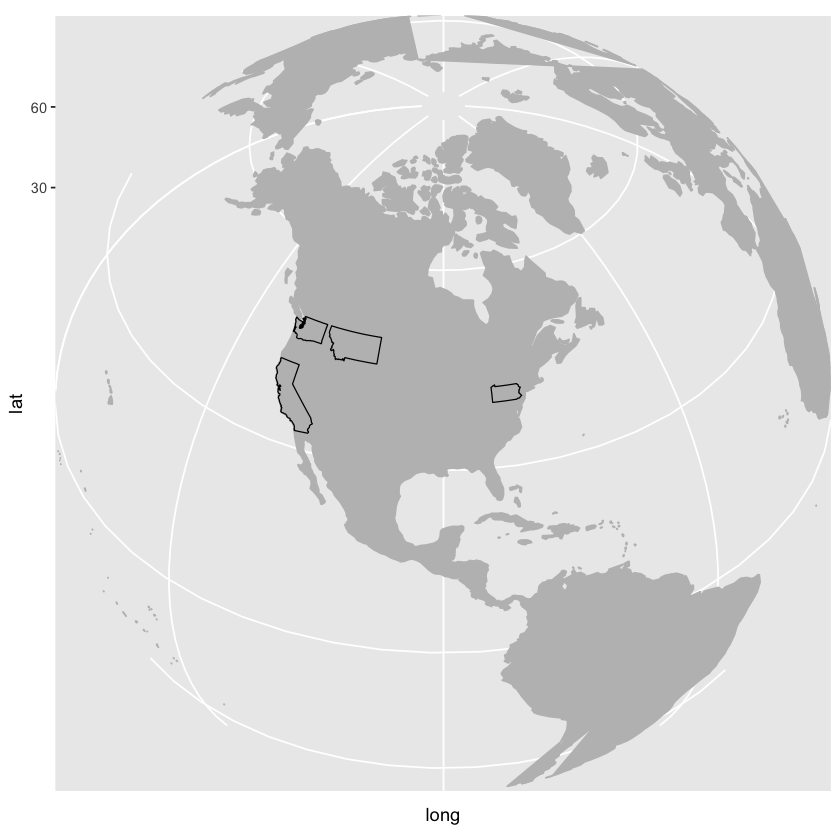

In [114]:
p 

In [4]:
setwd('/Users/davidwheeler/Desktop')

In [116]:
tiff('PA.tiff', units="in", 
     width=5, height=5,
     res=600, compression = 'lzw')
p
dev.off()

pdf 
  2

# PNW

Obtain data

In [34]:
# Obtain data
us <- getData("GADM",country="USA",level=1)
canada <- getData("GADM",country="CAN",level=1)
## States and provinces
# PNW
states    <- c('Idaho', 'Oregon', 'Washington','Montana', 'California','Nevada','Utah','Wyoming')

# Cananda
provinces <- c("British Columbia", "Alberta")

Subset data

In [35]:
# PNW
us.states <- us[us$NAME_1 %in% states,]
# Canada
ca.provinces <- canada[canada$NAME_1 %in% provinces,]

Plot


Attaching package: ‘geojsonio’


The following object is masked _by_ ‘.GlobalEnv’:

    states


The following object is masked from ‘package:geosphere’:

    centroid


The following object is masked from ‘package:base’:

    pretty




In [90]:
p <- ggplot(us.states,
       aes(x=long, y=lat, group=group))+
  geom_path(size=0.25)+
  geom_path(data=ca.provinces, size=0.25,color="grey60")+
  geom_path(data=subset(us.states, NAME_1 %in% c('Montana', 'California','Nevada','Utah','Wyoming')),
            size=0.25,color="grey60")+
  geom_polygon(data=subset(us.states, NAME_1 %in% c('Idaho', 'Oregon', 'Washington')),
               aes(x=long, y=lat, group=group), fill="white", colour = "black", size=0.50)+
  theme(panel.background = element_rect(fill = "white", colour = "grey50"))+
  coord_map("bonne", lat0 = 50,
            xlim = c(-127, -112),ylim = c(41, 50))+
  xlab("Longitude") +
  ylab("Latitude") 
#   geom_point(x = -122.3863392 , y = 48.4395581, pch = 20, alpha = 0.5, size = 4, col = "red")+ # NWREC
#   geom_point(x = -117.157595 , y = 46.7314109, pch = 20, alpha = 0.5, size = 4, col = "red")

Regions defined for each Polygons

Regions defined for each Polygons

Regions defined for each Polygons

Regions defined for each Polygons



In [91]:
getwd()

[1] "/Users/davidwheeler/Desktop"

In [92]:
setwd('/Users/davidwheeler/Desktop')

In [98]:
tiff('PNW-s.tiff', units="in", 
     width=10, height=10,
     res=300, compression = 'lzw')
# Change plot size to 4 x 3
options(repr.plot.width=20, repr.plot.height=20)
p
dev.off()

pdf 
  2